In [1]:
import os
os.chdir('..')
import matplotlib.pyplot as plt
import torch
from bcmout.Sphere import Sphere
S = Sphere(1)
b = S.random(100)
print(S)
print(b.shape)
print(S.belongs(b).shape)
print(torch.all(S.belongs(b)))

torch.Size([2, 100])
torch.Size([100])
tensor(True)


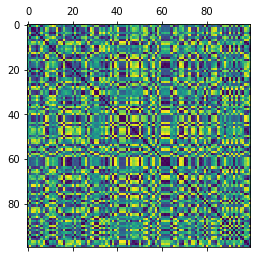

In [2]:
d=S.dissimilarity(b)
plt.matshow(d.numpy())
plt.show()

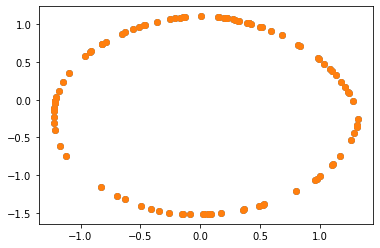

In [3]:
from sklearn.manifold import TSNE,MDS
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [20]:
from ConeSpace import ConeOverM
COverS = ConeOverM(S,100)
print(COverS)
print(COverS._metric)
c=COverS.random(1000,10)
print(torch.all(COverS.belongs(c)))

tensor(True)


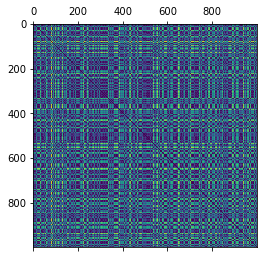

In [21]:
d=COverS.dissimilarity(c)
plt.matshow(d.numpy())
plt.show()
#print(d)

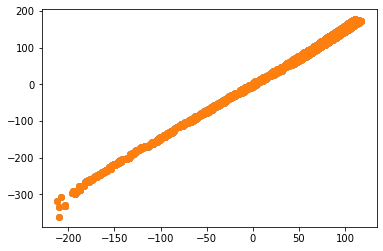

In [22]:

X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [7]:
from MeasureSpace import MeasureSpace
MonS = MeasureSpace(S,1)
print(MonS)
print(MonS._metric)
e = MonS.random(10,20,10)
print(torch.all(MonS.belongs(e)))

tensor(True)


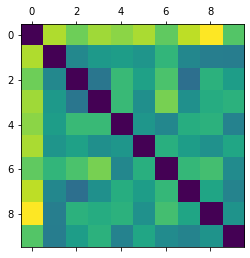

In [8]:
d = MonS.dissimilarity(e,max_steps=10000,eps=.00001)
plt.matshow(d.numpy())
plt.show()
#print(d)

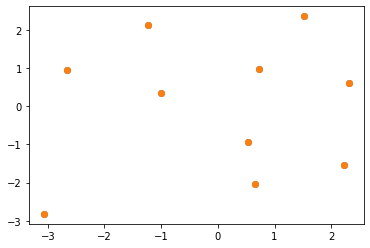

In [9]:
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()